# NetworkX

This Jupyter notebook provides an example of using the Python packages [gravis](https://pypi.org/project/gravis) and [NetworkX](https://networkx.org). The .ipynb file can be found [here](https://github.com/robert-haas/gravis/tree/master/examples).

## References

- [NetworkX website](https://networkx.org)
    - [Documentation](https://networkx.org/documentation/stable/)
        - [Tutorial](https://networkx.org/documentation/stable/tutorial.html)
        - [API reference](https://networkx.org/documentation/stable/reference/index.html)
        - [Examples](https://networkx.org/documentation/stable/auto_examples/index.html)

## Installation

- With [pip](https://pypi.org/project/networkx/): `pip install networkx`
- With [conda](https://anaconda.org/search?q=networkx): `conda install networkx`

## Import

In [1]:
import os 

import networkx as nx
import networkx.algorithms.community

import matplotlib.pyplot as plt
import gravis as gv

## Quick start

### Example 1

- Uses a graph stored in the package
- Visualizes edge weights as line widths

In [2]:
# Create a graph from a stored example
graph = nx.les_miserables_graph()

# It comes with an edge property named "weight" which can be used as edge size
gv.d3(graph, edge_size_data_source='weight', use_edge_size_normalization=True)

### Example 2

- Uses a graph generator to create a random graph
- Calculates quantitative measures (centralities) for nodes and edges
- Infers structure (community detection) in the graph
- Depicts the information by various visual elements

In [3]:
def assign_properties(g):
    # Centrality calculation
    node_centralities = nx.eigenvector_centrality(g)
    edge_centralities = nx.edge_betweenness_centrality(g)

    # Community detection
    communities = nx.algorithms.community.greedy_modularity_communities(g)
    
    # Graph properties
    g.graph['node_border_size'] = 1.5
    g.graph['node_border_color'] = 'white'
    g.graph['edge_opacity'] = 0.9

    # Node properties: Size by centrality, shape by size, color by community
    colors = ['red', 'blue', 'green', 'orange', 'pink', 'brown', 'yellow', 'cyan', 'magenta', 'violet']
    for node_id in g.nodes:
        node = g.nodes[node_id]
        node['size'] = 10 + node_centralities[node_id] * 100
        node['shape'] = 'rectangle' if node['size'] > 30 else 'circle'
        for community_counter, community_members in enumerate(communities):
            if node_id in community_members:
                break
        node['color'] = colors[community_counter % len(colors)]

    # Edge properties: Size by centrality, color by community (within=community color, between=black)
    for edge_id in g.edges:
        edge =  g.edges[edge_id]
        source_node = g.nodes[edge_id[0]]
        target_node = g.nodes[edge_id[1]]
        edge['size'] = edge_centralities[edge_id] * 100
        edge['color'] = source_node['color'] if source_node['color'] == target_node['color'] else 'black'


# Create a graph with a generator function
g = nx.powerlaw_cluster_graph(n=250, m=2, p=0.9)

# Assign node and edge properties
assign_properties(g)

# Plot it
gv.d3(g, zoom_factor=0.2)

## Graph construction

- API reference: [Graph creation](https://networkx.github.io/documentation/stable/reference/introduction.html#graph-creation)

### 1) Manual graph construction

- Tutorial: [Creating a graph](https://networkx.github.io/documentation/stable/tutorial.html#creating-a-graph)
- API reference
    - [Introduction: Basic graph types](https://networkx.github.io/documentation/stable/reference/introduction.html#networkx-basics)
    - [Graph types](https://networkx.github.io/documentation/stable/reference/classes/index.html)

#### 1.a) Graph

undirected, with self-loops, without parallel edges, with attributes

- [Graph](https://networkx.github.io/documentation/stable/reference/classes/graph.html)
    - [add_node](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html#networkx.Graph.add_node)
    - [add_nodes_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_nodes_from.html#networkx.Graph.add_nodes_from)
    - [add_edge](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html#networkx.Graph.add_edge)
    - [add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html#networkx.Graph.add_edges_from)

In [4]:
ug = nx.Graph()


# Node with automatic id
# ~ Not supported ~

# Node with user-defined id (=any hashable Python object except None)
ug.add_node('a')

# Node + attribute
ug.add_node('b', size=20)

# Node + attributes
ug.add_node('c', size=30, color='orange')


# Nodes
ug.add_nodes_from(['d', 'e'])  # argument: iterable of user-defined ids

# Nodes + attributes
ug.add_nodes_from([
    ('f', {'size': 10, 'color': 'red'}),
    ('g', {'size': 15, 'color': 'blue'}),
    ('h', {'size': 20, 'color': 'green'})
])


# Edge (nodes may already exist but do not need to)
ug.add_edge('a', 'b')

# Edge + attribute
ug.add_edge('b', 'c', size=3)

# Edge + attributes
ug.add_edge('c', 'd', size=4, color='orange')


# Edges
ug.add_edges_from([('d', 'e'), ('e', 'f')])

# Edges + attributes
ug.add_edges_from([
    ('f', 'g', {'size': 2.2, 'color': 'red'}),
    ('g', 'h', {'size': 4.4, 'color': 'blue'}),
    ('h', 'a', {'size': 4.4, 'color': 'green'}),
    ('a', 'a'),
])


gv.d3(ug, graph_height=200)

#### 1.b) DiGraph

directed, with self-loops, without parallel edges, with attributes

- [DiGraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html)
    - [add_node](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.add_node.html#networkx.DiGraph.add_node)
    - [add_nodes_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.add_nodes_from.html#networkx.DiGraph.add_nodes_from)
    - [add_edge](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.add_edge.html#networkx.DiGraph.add_edge)
    - [add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.add_edges_from.html#networkx.DiGraph.add_edges_from)

In [5]:
dg = nx.DiGraph(ug)

gv.d3(dg, graph_height=200)

#### 1.c) MultiGraph

undirected, with self-loops, with parallel edges, with attributes

- [MultiGraph](https://networkx.github.io/documentation/stable/reference/classes/multigraph.html)
    - [add_node](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiGraph.add_node.html#networkx.MultiGraph.add_node)
    - [add_nodes_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiGraph.add_nodes_from.html#networkx.MultiGraph.add_nodes_from)
    - [add_edge](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiGraph.add_edge.html#networkx.MultiGraph.add_edge)
    - [add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiGraph.add_edges_from.html#networkx.MultiGraph.add_edges_from)

In [6]:
umg = nx.MultiGraph()


# Nodes
umg.add_nodes_from([
    ('a'),
    ('b', {'size': 20}),
    ('c', {'size': 30, 'color': 'orange'}),
    ('d'),
    ('e'),
    ('f', {'size': 10, 'color': 'red'}),
    ('g', {'size': 15, 'color': 'blue'}),
    ('h', {'size': 20, 'color': 'green'}),
])


# Edges
umg.add_edges_from([
    ('a', 'b'),
    ('b', 'c', {'size': 3}),
    ('c', 'd', {'size': 4, 'color': 'orange'}),
    ('d', 'e'),
    ('e', 'f'),
    ('f', 'g', {'size': 2.2, 'color': 'red'}),
    ('g', 'h', {'size': 4.4, 'color': 'blue'}),
    ('h', 'a', {'size': 4.4, 'color': 'green'}),
    ('a', 'a'),
    ('a', 'a'),
    ('a', 'b'),
    ('b', 'a'),
])


gv.d3(umg, graph_height=200, edge_curvature=0.8)

#### 1.d) MultiDiGraph

directed, with self-loops, with parallel edges, with attributes

- [MultiDiGraph](https://networkx.github.io/documentation/stable/reference/classes/multidigraph.html)
    - [add_node](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.add_node.html#networkx.MultiDiGraph.add_node)
    - [add_nodes_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.add_nodes_from.html#networkx.MultiDiGraph.add_nodes_from)
    - [add_edge](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.add_edge.html#networkx.MultiDiGraph.add_edge)
    - [add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiDiGraph.add_edges_from.html#networkx.MultiDiGraph.add_edges_from)

In [7]:
dmg = nx.MultiDiGraph(umg)

gv.d3(dmg, graph_height=200, edge_curvature=0.8)

#### Assign attributes to a created graph

In [8]:
g = nx.Graph()
g.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)])

Graph attributes

In [9]:
g.graph['background_color'] = 'gray'
g.graph['node_shape'] = 'rectangle'
g.graph['node_label_color'] = 'white'
g.graph['edge_opacity'] = 0.3

Node attributes

In [10]:
# Nodes
for i, node_id in enumerate(g.nodes):
    g.nodes[node_id]['size'] = 5 + i*5
    g.nodes[node_id]['color'] = 'lightblue'

# Node
g.nodes[3]['color'] = 'darkred'
g.nodes[3]['shape'] = 'hexagon'
g.nodes[3]['size'] = 40
g.nodes[3]['opacity'] = 0.3

Edge attributes

In [11]:
# Edges
for i, edge_id in enumerate(g.edges):
    g.edges[edge_id]['size'] = 1 + i
    g.edges[edge_id]['color'] = 'lightgreen'

# Edge
g.edges[(3, 4)]['size'] = 1
g.edges[(3, 4)]['color'] = 'darkred'

In [12]:
gv.d3(g, graph_height=200)

### 2) Algorithmic graph construction

- Tutorial: [Graph generators and operations](https://networkx.github.io/documentation/stable/tutorial.html#graph-generators-and-graph-operations)
- API reference: [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

In [13]:
n = 8
e = 12

In [14]:
# Generators for classic graphs
g = nx.complete_graph(n)
g = nx.complete_bipartite_graph(n, n)
g = nx.barbell_graph(n, n)
g = nx.lollipop_graph(n, n)

# Stochastic graph generators
g = nx.erdos_renyi_graph(100, 0.15)
g = nx.watts_strogatz_graph(30, 3, 0.1)
g = nx.barabasi_albert_graph(100, 5)
g = nx.random_lobster(100, 0.9, 0.9)

# Nice for demonstrating community structures
g = nx.dorogovtsev_goltsev_mendes_graph(n)
g = nx.connected_caveman_graph(l=5, k=6)

# Nice for demonstrating forces (and node degree centrality)
g = nx.star_graph(n)
g = nx.wheel_graph(n)
g = nx.turan_graph(n, 2)
g = nx.complete_graph(n)

# Nice for demonstrating edge betweenness
g = nx.barbell_graph(n, 1)
g = nx.hexagonal_lattice_graph(3, 4)
g = nx.triangular_lattice_graph(4, 8)

# Random graphs
g = nx.erdos_renyi_graph(n=n, p=0.02)
g = nx.fast_gnp_random_graph(n=n, p=2/1000)
g = nx.newman_watts_strogatz_graph(n=n, k=5, p=0.05)
g = nx.watts_strogatz_graph(n=n, k=5, p=0.3)
g = nx.barabasi_albert_graph(n=n, m=2)
g = nx.dual_barabasi_albert_graph(n=n, m1=1, m2=2, p=0.6)
g = nx.powerlaw_cluster_graph(n=n, m=2, p=0.7)
g = nx.random_lobster(n=n, p1=0.95, p2=0.75)
g = nx.duplication_divergence_graph(n=n, p=0.4)
g = nx.havel_hakimi_graph(deg_sequence=[6]*10+[4]*10)

# Geometrically nice layouts (reminding of soap bubble physics)
g = nx.dodecahedral_graph()
g = nx.moebius_kantor_graph()
g = nx.circular_ladder_graph(n)
g = nx.circulant_graph(n, [2, 1])
g = nx.lollipop_graph(n, 5)

In [15]:
# Directed
g = nx.directed_havel_hakimi_graph(in_deg_sequence=[2]*20+[3]*10+[2]*10, out_deg_sequence=[2]*30+[3]*10)

### 3) Graph loading from an internal collection

- API reference: [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

- Book: [An atlas of graphs](https://global.oup.com/academic/product/an-atlas-of-graphs-9780198526506?cc=at&lang=en&) ("Graph atlas")

In [16]:
# Graph atlas
g = nx.graph_atlas(986)

# Classical small graphs
g = nx.cubical_graph()
g = nx.diamond_graph()
g = nx.dodecahedral_graph()
g = nx.icosahedral_graph()
g = nx.octahedral_graph()
g = nx.tetrahedral_graph()
g = nx.truncated_cube_graph()
g = nx.truncated_tetrahedron_graph()

g = nx.bull_graph()
g = nx.chvatal_graph()
g = nx.desargues_graph()
g = nx.frucht_graph()
g = nx.heawood_graph()
g = nx.hoffman_singleton_graph()
g = nx.house_graph()
g = nx.house_x_graph()
g = nx.krackhardt_kite_graph()
g = nx.moebius_kantor_graph()
g = nx.pappus_graph()
g = nx.petersen_graph()
g = nx.sedgewick_maze_graph()
g = nx.tutte_graph()

# Social networks
g = nx.les_miserables_graph()
g = nx.karate_club_graph()
g = nx.davis_southern_women_graph()
g = nx.florentine_families_graph()

### 4) Graph import and export

- [Reading and writing graphs](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)

#### Import

In [17]:
filepath = os.path.join('data', 'networkx_graph.gml')
g = nx.read_gml(filepath)

# methods for other formats
nx.read_adjlist
nx.read_multiline_adjlist
nx.read_edgelist
nx.read_gexf
nx.read_gpickle
nx.read_graphml
nx.json_graph.adjacency_graph
nx.json_graph.cytoscape_graph
nx.json_graph.node_link_graph
nx.json_graph.jit_graph
nx.json_graph.tree_graph
nx.read_leda
nx.read_pajek
nx.read_shp

<function networkx.readwrite.nx_shp.read_shp(path, simplify=True, geom_attrs=True, strict=True)>

#### Export

In [18]:
filepath = os.path.join('data', 'networkx_graph.gml')
nx.write_gml(g, filepath)

# methods for other formats
nx.write_adjlist
nx.write_multiline_adjlist
nx.write_edgelist
nx.write_gexf
nx.write_gpickle
nx.write_graphml
nx.write_pajek
nx.write_shp

<function networkx.readwrite.nx_shp.write_shp(G, outdir)>

### 5) Graph modification that results in a new graph

- API reference: [Operators](https://networkx.github.io/documentation/stable/reference/algorithms/operators.html)

## Basic graph inspection

- API reference: [Graph reporting](https://networkx.github.io/documentation/stable/reference/introduction.html#graph-reporting)

### 1) Graph and its properties

In [19]:
g = nx.les_miserables_graph()

print('Type:', type(g))
print('Directed:', g.is_directed())
print('Number of nodes:', g.number_of_nodes())
print('Number of edges:', g.number_of_edges())
print('Attributes:', g.graph)

Type: <class 'networkx.classes.graph.Graph'>
Directed: False
Number of nodes: 77
Number of edges: 254
Attributes: {}


### 2) Nodes and their properties

In [20]:
for node in g.nodes:
    attributes = g.nodes[node]
    degree = g.degree(node)
    print('Type:', type(node), type(attributes))
    print('Id:', node)
    print('Attributes:', attributes)
    print('Degree:', degree)
    break

print()
for node, attributes in g.nodes.data():
    print('Type:', type(node), type(attributes))
    print('Id:', node)
    print('Attributes:', attributes)
    break

Type: <class 'str'> <class 'dict'>
Id: Napoleon
Attributes: {}
Degree: 1

Type: <class 'str'> <class 'dict'>
Id: Napoleon
Attributes: {}


### 3) Edges and their properties

In [21]:
for edge in g.edges:
    source, target = edge
    attributes = g.edges[edge]
    print('Type:', type(source), type(target), type(attributes))
    print('Source:', source)
    print('Target:', target)
    print('Attributes:', )
    break

print()
for source, target, attributes in g.edges.data():
    print('Type:', type(source), type(target), type(attributes))
    print('Source:', source)
    print('Target:', target)
    print('Attributes:', attributes)
    break

Type: <class 'str'> <class 'str'> <class 'dict'>
Source: Napoleon
Target: Myriel
Attributes:

Type: <class 'str'> <class 'str'> <class 'dict'>
Source: Napoleon
Target: Myriel
Attributes: {'weight': 1}


## Calculating graph measures and metrics

- Tutorial: [Analyzing graphs](https://networkx.github.io/documentation/stable/tutorial.html#analyzing-graphs)
- API reference: [Algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)

### Centrality

- API reference
    - [Centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)
    - [Link analysis](https://networkx.github.io/documentation/stable/reference/algorithms/link_analysis.html)
    - [Vitality](https://networkx.github.io/documentation/stable/reference/algorithms/vitality.html)

In [22]:
g = nx.barbell_graph(8, 1)
dg = nx.directed_havel_hakimi_graph([1, 1, 2, 3, 3], [1, 1, 2, 3, 3])

Graph measures: single scalar value

In [23]:
scalar = nx.estrada_index(g)
scalar = nx.global_reaching_centrality(g)

Node measures: dict (node -> value)

In [24]:
node_dict = nx.degree_centrality(g)
node_dict = nx.in_degree_centrality(dg)
node_dict = nx.out_degree_centrality(dg)

node_dict = nx.eigenvector_centrality(g)
node_dict = nx.eigenvector_centrality_numpy(g)

node_dict = nx.katz_centrality(g)
node_dict = nx.katz_centrality_numpy(g)

node_dict = nx.closeness_centrality(g)
#nx.incremental_closeness_centrality(g)

node_dict = nx.current_flow_closeness_centrality(g)
node_dict = nx.information_centrality(g)

node_dict = nx.betweenness_centrality(g)

node_dict = nx.current_flow_betweenness_centrality(g)
node_dict = nx.approximate_current_flow_betweenness_centrality(g)

node_dict = nx.communicability_betweenness_centrality(g)

node_dict = nx.load_centrality(g)


node_dict = nx.subgraph_centrality(g)
node_dict = nx.subgraph_centrality_exp(g)

node_dict = nx.harmonic_centrality(g)

#nx.percolation_centrality(g)
node_dict = nx.second_order_centrality(g)

In [25]:
node_dict_dict = nx.dispersion(g)
node_list = nx.voterank(g)

Edge measures: dict (edge -> value)

In [26]:
edge_dict = nx.edge_betweenness_centrality(g)
edge_dict = nx.edge_current_flow_betweenness_centrality(g)
edge_dict = nx.edge_load_centrality(g)

In [27]:
node_dict = nx.pagerank(g)
node_np_matrix = nx.google_matrix(g)

node_tuple_dict = nx.hits(g)
node_np_matrix = nx.hub_matrix(g)
node_np_matrix = nx.authority_matrix(g)

In [28]:
node_dict = nx.closeness_vitality(g)  # value can be -inf

### Groups of nodes

#### Cliques

- API reference: [Clique](https://networkx.github.io/documentation/stable/reference/algorithms/clique.html)

In [29]:
# TODO

#### Cores

- API reference: [Cores](https://networkx.github.io/documentation/stable/reference/algorithms/core.html)

In [30]:
# TODO

#### Components

- API reference
    - [Component](https://networkx.github.io/documentation/stable/reference/algorithms/component.html)
    - [Connectivity](https://networkx.github.io/documentation/stable/reference/algorithms/connectivity.html)

In [31]:
# TODO

#### Communities

- API reference
    - [Communities](https://networkx.github.io/documentation/stable/reference/algorithms/community.html)
    - [Linear algebra](https://networkx.github.io/documentation/stable/reference/linalg.html)
        - Modularity matrix
        - Spectrum

In [32]:
g = nx.barbell_graph(8, 1)

# TODO

##### Partitions via centrality measures
- Girvan–Newman method

In [33]:
generator = networkx.algorithms.community.girvan_newman(g)
result1 = next(generator)
result2 = next(generator)
result3 = next(generator)

print(result1)
print(result2)
print(result3)

({0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15, 16})
({0, 1, 2, 3, 4, 5, 6, 7}, {9, 10, 11, 12, 13, 14, 15, 16}, {8})
({0}, {1, 2, 3, 4, 5, 6, 7}, {9, 10, 11, 12, 13, 14, 15, 16}, {8})


In [34]:
for node_id in g.nodes:
    g.nodes[node_id]["color"] = 'red' if node_id in result2[0] else 'green' if node_id in result2[1] else 'blue'

gv.d3(g, use_y_positioning_force=True)

- Clauset-Newman-Moore greedy modularity maximization

In [35]:
result = networkx.algorithms.community.greedy_modularity_communities(g)
result

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8}),
 frozenset({9, 10, 11, 12, 13, 14, 15, 16})]

##### Bisection: Partition a graph into two blocks

- Kernighan–Lin algorithm

In [36]:
result = networkx.algorithms.community.kernighan_lin_bisection(g)
result

({0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15, 16})

##### Find k-clique communities

- percolation method

In [37]:
iterator = networkx.algorithms.community.k_clique_communities(g, 3)
result = list(iterator)
result

[frozenset({0, 1, 2, 3, 4, 5, 6, 7}),
 frozenset({9, 10, 11, 12, 13, 14, 15, 16})]

##### Label propagation

- Asynchronous label propagation

In [38]:
# TODO: networkx.algorithms.community.asyn_lpa_communities(g)

In [39]:
generator = networkx.algorithms.community.label_propagation_communities(g)
result = list(generator)
result

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}]

##### Fluid Communities

- Asynchronous Fluid Communities algorithm

In [40]:
iterator = networkx.algorithms.community.asyn_fluidc(g, k=3)
result = list(iterator)
result

[{9, 10, 11, 12, 13, 14, 15, 16}, {7, 8}, {0, 1, 2, 3, 4, 5, 6}]

In [41]:
for node_id in g.nodes:
    g.nodes[node_id]["color"] = 'red' if node_id in result[0] else 'green' if node_id in result[1] else 'blue'

gv.d3(g, use_y_positioning_force=True)

##### Validation of partitions

In [42]:
networkx.algorithms.community.is_partition(g, result3)

True

##### Quality measure of partitions

In [43]:
networkx.algorithms.community.coverage(g, result3)

0.8448275862068966

In [44]:
networkx.algorithms.community.performance(g, result3)

0.9338235294117647

In [45]:
nx.connected_components(g)
nx.clustering(g)
nx.all_pairs_shortest_path(g)

<generator object all_pairs_shortest_path at 0x7ff1f7347950>

### Paths and distances

- API reference
    - [Cycles](https://networkx.github.io/documentation/stable/reference/algorithms/cycles.html)
    - [Simple paths](https://networkx.github.io/documentation/stable/reference/algorithms/simple_paths.html)
    - [Shortest paths](https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html)
    - [Voronoi cells](https://networkx.github.io/documentation/stable/reference/algorithms/voronoi.html)

In [46]:
# TODO

### Global properties

- API reference
    - [Assortativity](https://networkx.github.io/documentation/stable/reference/algorithms/assortativity.html)
    - [Clustering](https://networkx.github.io/documentation/stable/reference/algorithms/clustering.html)
    - [Communicability](https://networkx.github.io/documentation/stable/reference/algorithms/communicability_alg.html)
    - [Distance Measures](https://networkx.github.io/documentation/stable/reference/algorithms/distance_measures.html)
    - [Non-randomness](https://networkx.github.io/documentation/stable/reference/algorithms/non_randomness.html)
    - [Reciprocity](https://networkx.github.io/documentation/stable/reference/algorithms/reciprocity.html)
    - [Rich club](https://networkx.github.io/documentation/stable/reference/algorithms/rich_club.html)
    - [Small-world](https://networkx.github.io/documentation/stable/reference/algorithms/smallworld.html)
    - [s metric](https://networkx.github.io/documentation/stable/reference/algorithms/smetric.html)
    - [Tree](https://networkx.github.io/documentation/stable/reference/algorithms/tree.html)
    - [Triadic census](https://networkx.github.io/documentation/stable/reference/algorithms/triads.html)
    - [Wiener index](https://networkx.github.io/documentation/stable/reference/algorithms/wiener.html)

In [47]:
# TODO

## Graph visualization

- Tutorial: [Drawing graphs](https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs)
- API reference
    - [Introduction: Drawing](https://networkx.github.io/documentation/stable/reference/introduction.html#drawing)
    - [Drawing](https://networkx.github.io/documentation/stable/reference/drawing.html)

### Layout calculation

- API reference: [Graph layout](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)

In [48]:
graph = nx.les_miserables_graph()

layout = nx.circular_layout(graph, scale=500)
#layout = nx.kamada_kawai_layout(graph, scale=500)
#layout = nx.spring_layout(graph, scale=500)

for node_id, (x, y) in layout.items():
    node = graph.nodes[node_id]
    node['x'] = x
    node['y'] = y

gv.d3(graph, layout_algorithm_active=False, show_menu=False)

### Plotting

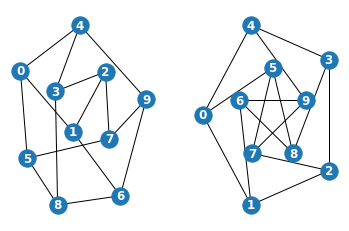

In [49]:
g = nx.petersen_graph()

plt.subplot(121)
nx.draw(g, with_labels=True, font_weight='bold', font_color='white')

plt.subplot(122)
nx.draw_shell(g, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', font_color='white')

## Further topics

- [Covering](https://networkx.github.io/documentation/stable/reference/algorithms/covering.html)
- [Cut](https://networkx.github.io/documentation/stable/reference/algorithms/cuts.html)
- [Flow](https://networkx.github.io/documentation/stable/reference/algorithms/flow.html)
- [Graph traversal](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html)
- Graph comparison
    - [Matching](https://networkx.github.io/documentation/stable/reference/algorithms/matching.html)
    - [Similarity](https://networkx.github.io/documentation/stable/reference/algorithms/similarity.html)